# NBalls Visualization

This Jupyter notebook will guide you through the process of visualization balls in high dimensions. The process consists of three steps:

1. [Generating Nballs](#Generating-Nballs)
2. [Reducing Dimensionality](#Reducing-Dimensionality)
3. [Visualization](#Visualization)

If you already have the balls in high dimensions you can skip first step and go dirclty to [setp 2](Reducing-Dimensionality).

## Requriments:
Please make sure you have the latest version of [Ipywidgets](https://github.com/jupyter-widgets/ipywidgets) package. Also, make sure you already downloaded Wordnet resource by running the following:
```
implort nltk
nltk.donwload()
```

---

## Generating Nballs

During this step, balls in high dimensions will be generated. 

### Input:
The input of this step is the following:
* **Set of words:**  You can either choose one of the predefined samples or just enter your words in English only.
* **Word embeddings:** You have to give a path to file which contains the word embedding.

### Output:
* **Nballs:** A file contains the balls in high dimensions with the tree structure perfectly encoded. The file can be found in the data folder inside the project.

In [1]:
from ipywidgets import Layout
import ipywidgets as widgets
import os, shutil, glob
from IPython.display import clear_output

SAMPLE = None

project_path        = os.path.dirname(os.getcwd())
data_path           = project_path + '/data'
custom_input        = data_path + "/custom_input.txt"
children_file_path  = data_path + "/small.children.txt"
cat_code_file_path  = data_path + "/small.catcode.txt"
word2vec            = data_path + "/glove.txt"
nballs_path         = data_path + "/nballs.txt"

def set_up_data_foler():
    if not os.path.isdir(data_path):
        os.mkdir(data_path)
    else:
        for file in glob.glob(data_path+"/*"):
            if not "glove" in file and not "data_out" in file:
                os.remove(file)
            elif "data_out" in file:
                shutil.rmtree(file)
        
def generate_files(glove_file_path, output_path, sample, input_file_path):
    generate_files_string_command = "main_vis.py --gen --w2v %s --output %s --sample %s --input %s"
    command = generate_files_string_command%(glove_file_path, output_path, sample, input_file_path)     
    %run $command
    check_input_for_nballs()
    
def generate_nballs(glove_file_path):
    generate_balls_string_command = "../nball.py --train_nball %s --w2v %s --ws_child %s --ws_catcode %s --log %s/log.txt"
    command = generate_balls_string_command%(nballs_path, glove_file_path, children_file_path, cat_code_file_path, data_path)     
    %run $command
    if os.path.exists(nballs_path):
        print("Finihshed generating balls. Move to next cell.")
    
def write_data_to_file(file_path, lines):
    with open(file_path, 'w') as file:
        for line in lines:
            file.write(line)
            if not '\n' in line:
                file.write("\n")

# UI Widgets
input_examples         = widgets.Combobox( placeholder='Choose Example', description='Input:', options=['Cities','Fruits','Custom'], layout=Layout(height='auto', width='50%'))
check_input_button     = widgets.Button(description='Check', button_style='success')
words_input            = widgets.Textarea(value='',description='Words', placeholder='keywords comma separated',  layout=Layout(height='auto', width='50%'))
word2vec_path_input    = widgets.Text(placeholder='word2vec', value = word2vec, description='word2vec', layout=Layout(height='auto', width='50%'))
generate_tree_button   = widgets.Button(description='Generate Tree', button_style='success')
generate_nballs_button = widgets.Button(description='Generate Balls', button_style='success')
buttons_box            = widgets.Box([word2vec_path_input,generate_tree_button])
custom_box             = widgets.Box([words_input,check_input_button])

# UI Widget functions
def on_input_example_choose(change):
    global SAMPLE
    if change['type'] == 'change' and change['name'] == 'value':
        choosen_values = change['new']
        input_examples.disabled = True
        SAMPLE = choosen_values
        if (choosen_values == 'Custom'):
            display(custom_box)
            SAMPLE = None
        else:
            display(buttons_box)

def on_check_button_clicked(button):
    parsed_tokens = [x.strip() for x in str(words_input.value).split(',')]
    words = [x for x in parsed_tokens if x]
    if len(words) > 0:
        words_input.disabled = True
        check_input_button.disabled = True
        write_data_to_file(custom_input,words)
        display(buttons_box)
    else:
        print("Can't parse your input! Try Again!")
        
def check_input_for_nballs():
    if os.path.exists(children_file_path) and os.path.exists(cat_code_file_path):
        display(generate_nballs_button)
        
def on_generate_tree_button_clicked(button):
    if word2vec_path_input.value:
        word2vec_path_input.disabled = True
        generate_tree_button.disabled = True
        generate_files(word2vec_path_input.value, data_path, SAMPLE, custom_input)
        
def on_generate_balls_button_clicked(button):
    print("Start generating balls")
    generate_nballs_button.disabled = True
    generate_nballs(word2vec_path_input.value)
    
# Set Widget listeners
input_examples.observe(on_input_example_choose)
check_input_button.on_click(on_check_button_clicked)
generate_tree_button.on_click(on_generate_tree_button_clicked)
generate_nballs_button.on_click(on_generate_balls_button_clicked)

# Start UI nteraction
set_up_data_foler()
display(input_examples)

Combobox(value='', description='Input:', layout=Layout(height='auto', width='50%'), options=('Cities', 'Fruits…

Box(children=(Textarea(value='', description='Words', layout=Layout(height='auto', width='50%'), placeholder='…

Box(children=(Text(value='C:\\Users\\Mhd-Ghanem\\Desktop\\Lab\\nball4tree-original/data/glove.txt', descriptio…

Start generating files...
67 words paths found
22 Leaves found
44 Subtree found
Finish generating files...


Button(button_style='success', description='Generate Balls', style=ButtonStyle())

Start generating balls
['accommodate.v.04', 'transfer.v.05', 'entity.n.01']
*** entity.n.01
*** transfer.v.05
*** accommodate.v.04
finished training of all families

loading balls....
[167]
totally 64  balls are loaded
updating first level children...
checking whether the tree structure is perfectly encoded in nball embeddings...

loading balls....
[167]
totally 64  balls are loaded
failed families with P []
failed families with DC []
the tree structure is perfectly encoded in nball embeddings.

generating nball embedding file...

Finihshed generating balls. Move to next cell.


## Reducing Dimensionality

During this step the dimensions of the balls will be reduced to be 2. In other words, the balls will be converted to circles. In this step the PCA method is used to reduce the dimensions. During the PCA, some of the tree relationships are not maintained. An algorithm is being used to fix these broken relationships. More about the algorithm will be written later. 

### Input:
The input of this step is the following:
* **Nballs:**  The file contains the balls which generated by step 1 or your own nballs file.
* **Children:** A file contains the child-parent relationships between the balls. 

### Output:
* **Circles Before:** A file contains the circles after applying PCA on balls and without fixing the broken relationships.
* **Circles After:** A file contains the circles after applying PCA and fixing the broken relationships.
* Both files can be found in the data folder of the project.


### Running throguth command-line:
```
python main_vis.py --reduceAndFix --balls BALLS_FILE_PATH --children CHILDREN_FILE_PATH --output OUTPUT_FILE_PATH
```
* --balls: A file contains the balls which generated by step 1 or your own nballs file.
* --children: A file contains the child-parent relationships between the balls.
* --output: The output file which contains the circles. The path will be used to generate two files one contains the circles before applying the algorithm and one after applying the algorithm.


After applying the executing this step, the result of three check operations will be shown. Each operation check whether the tree structure is maintained by checking two conditions, namely disjoint and contains conditions. The first operation is performed on the input balls. The second one is performed on the circles before running the fixing the algorithm. The third one is performed on the circles after running the algorithm.


In [2]:
import ipywidgets as widgets
import os, shutil
from ipywidgets import Layout

project_path        = os.path.dirname(os.getcwd())
data_path           = project_path + '/data'
output_path         = data_path + '/circles.txt'
children_file_path  = data_path + "/small.children.txt"
nballs_path         = data_path + "/nballs.txt"

if not os.path.isdir(data_path):
    os.mkdir(data_path)

def reduce_and_fix(nball_file_path, children_file_path, output_path):
    reduce_and_fix_string_command = "main_vis.py --reduceAndFix --balls %s --children %s --output %s"
    command = reduce_and_fix_string_command%(nball_file_path, children_file_path, output_path)
    %run $command

balls_path_input    = widgets.Text(placeholder='Balls file path', value = "", description='Balls', layout=Layout(height='auto', width='50%'))
children_path_input = widgets.Text(placeholder='Children file path', value = "", description='Children', layout=Layout(height='auto', width='50%'))
redcue_button       = widgets.Button(description='Reduce & Check', button_style='success')

def on_reduce_button_clicked(button):
    global children_file_path
    if balls_path_input.value and children_path_input.value:
        try:
            shutil.copyfile(children_path_input.value, children_file_path)
        except:
            pass
        button.disabled = False
        reduce_and_fix(balls_path_input.value, children_path_input.value, output_path)
    else:
        print("Check files paths")

redcue_button.on_click(on_reduce_button_clicked)    
    
# Start UI Interaction
def start():
    display(balls_path_input)
    display(children_path_input)
    display(redcue_button)

print("Paths if you already executed step 1:")
print("Balls    ", nballs_path)
print("Children ", children_file_path)
print("")
start()

Paths if you already executed step 1:
Balls     C:\Users\Mhd-Ghanem\Desktop\Lab\nball4tree-original/data/nballs.txt
Children  C:\Users\Mhd-Ghanem\Desktop\Lab\nball4tree-original/data/small.children.txt



Text(value='', description='Balls', layout=Layout(height='auto', width='50%'), placeholder='Balls file path')

Text(value='', description='Children', layout=Layout(height='auto', width='50%'), placeholder='Children file p…

Button(button_style='success', description='Reduce & Check', style=ButtonStyle())


Balls reduced to circles successfully

Checking N-Balls
Disjoint Condition Failed Cases {}
Contained Condition Failed Cases {}

Checking 2D circles before fixing
Disjoint Condition Failed Cases {
    "*root*": [
        "accommodate.v.04 entity.n.01"
    ],
    "building.n.01": [
        "house.n.12 theater.n.01"
    ],
    "entity.n.01": [
        "object.n.01 abstraction.n.06"
    ]
}
Contained Condition Failed Cases {}

Checking 2D circles after fixing
Disjoint Condition Failed Cases {
    "building.n.01": [
        "house.n.12 theater.n.01"
    ]
}
Contained Condition Failed Cases {}



## Visualization

During this step the circles from the second step will be visualized. In the visualization every circle correspond to a word. The word shown at random point on the circle perimeter with the same color as the circle.

### Visualization options explanation:
* **Filter:** You can use the filter to show or hide certain words. Filter can be operated in two modes: SubTree and Individual.
* **SubTree Filter Mode:** In this mode, whenever you hide one of the words all children will be hidden. Also, whenever you check one of the words all the ancestors of the words will be shown.
* **Individual Filter Mode:** In this mode, hiding or showing a word will only affect the words itself.
* **Show All:** This button will show all words.
* **Hide All:** This button will hide all words.
* **Circles:** This toggle button is to switch between the circles before and after applying the algorithm.

### Running throguth command-line:
```
python main_vis.py --vis --circles CIRCLES_FILE_PATH --showenWords WORDS_FILE_PATH
```
* --circles: A path to the file used in the [step 2](Reducing-Dimensionality).
* --showenWords: A path to file contains a the words that should be visualized. Each line should contains one word.

Accordion(children=(VBox(children=(Box(children=(Label(value='Filter:'), ToggleButtons(options=('SubTree', 'In…

<IPython.core.display.Javascript object>


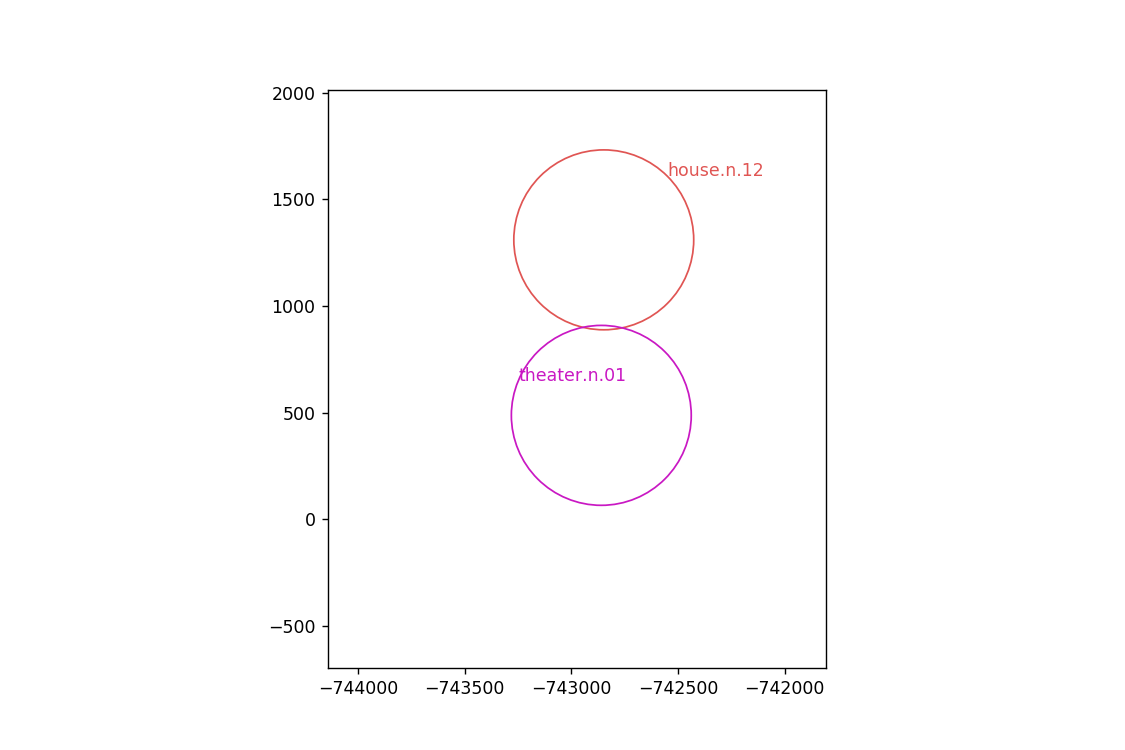

In [3]:
%matplotlib notebook
from matplotlib import pyplot
from matplotlib.patches import Circle
from math import pi, cos, sin
from ipywidgets import AppLayout, Layout, GridspecLayout,widgets
from IPython.display import clear_output
import numpy as np
import matplotlib.animation as animation
import random, os

project_path        = os.path.dirname(os.getcwd())
data_path           = project_path + '/data'
children_file_path  = data_path + "/small.children.txt"
before_fix_path     = data_path + "/circles_before.txt"
after_fix_path      = data_path + "/circles_after.txt"

ax,fig = None, None
circles_dic_before, circles_dic_after, children_dic, checkbox_dic, colors_dic, angles_dic = {}, {}, {}, {}, {}, {}
is_after, is_individual = True, False

# UI Widgets
select_all_button               = widgets.Button(description='Show All', button_style='success', layout=Layout(height='auto', width='auto'))
unselect_all_button             = widgets.Button(description='Hide All', button_style='danger', layout=Layout(height='auto', width='auto'))
select_unselect_all_box         = GridspecLayout(2, 1, height='auto')
filter_mode_toggle_button       = widgets.ToggleButtons(description='', options=['SubTree', 'Individual'], value='SubTree')
filter_mode_box                 = widgets.Box([widgets.Label(value="Filter:"), filter_mode_toggle_button])
vis_mode_toggle_button          = widgets.ToggleButtons(description='', options=['Before', 'After'], value='After')
mode_box                        = widgets.Box([widgets.Label(value="Circles:"),vis_mode_toggle_button])
margin                          = widgets.Label(value="")
select_unselect_all_box[0, 0]   = select_all_button
select_unselect_all_box[1, 0]   = unselect_all_button


def show_options(grid):
    global select_unselect_all_buttons_box, vis_mode_toggle_button, select_unselect_all_box
    extendted_grid = AppLayout(center=grid, right_sidebar=select_unselect_all_box, justify_items='center', align_items='center', pane_widths=[0,8, 1])
    options_list = widgets.VBox([filter_mode_box ,extendted_grid, margin, mode_box])
    accordion = widgets.Accordion(children=[options_list])
    accordion.set_title(0, 'Visulization Options')
    display(accordion)

def generate_colors(words):
    global colors_dic, angles_dic
    angles = random.sample(list(np.arange(0, 2 * pi, 2*pi/ len(words))), len(words))
    colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(words))]
    for i, word  in enumerate(words):
        colors_dic[word] = colors[i]
        angles_dic[word] = angles[i]
    
def read_files():
    global circles_dic_before, circles_dic_after
    read_balls_file(before_fix_path, circles_dic_before)
    read_balls_file(after_fix_path, circles_dic_after)
    read_children_file(children_file_path, children_dic)
    words = list(circles_dic_after.keys())
    create_checkbox_grid(words)
    generate_colors(words)
    plot_dic("", [])
    
def read_balls_file(file_path, circles_dic=None):
    if circles_dic is None:
        circles_dic = dict()
    with open(file_path, mode="r", encoding="utf-8") as balls_file:
        for line in balls_file.readlines():
            tokens = line.strip().split()
            circles_dic[tokens[0]] = [float(ele) for ele in tokens[1:]]
        return circles_dic
    
def read_children_file(ws_children_file, children_dic=None):
    if children_dic is None:
        children_dic = dict()
    with open(ws_children_file, 'r') as children_file:
        for ln in children_file:
            tokens = ln[:-1].split()
            children_dic[tokens[0]] = tokens[1:]
        return children_dic

def create_checkbox_grid(words):
    words.sort()
    global ax, fig, checkbox_dic, gride
    for word in words:
        checkbox_changed = widgets.Checkbox(value=True, description=word)
        checkbox_changed.observe(checkbox_changed_callback)
        checkbox_dic[word] = checkbox_changed
    grid = widgets.GridBox(list(checkbox_dic.values()), layout=widgets.Layout(grid_template_columns="repeat(5, 150px)"))
    show_options(grid)
    fig, ax = pyplot.subplots()
    ax.set_aspect(1)
    fig.set_figheight(6)
    fig.set_figwidth(9)
    
def random_point(xy, r, theta):
    return xy[0] + cos(theta) * float(r), xy[1] + sin(theta) * float(r)
    
def plot(vectors, radius, words, fig, ax):
    global checkbox_dic, colors_dic, angles_dic
    for i, vector in enumerate(np.array(vectors)):
        e = Circle(xy=vector, radius=float(radius[i]))
        ax.add_artist(e)
        e.set_edgecolor(colors_dic[words[i]])
        e.set_facecolor('none')

    x = [i[0] for i in vectors]
    y = [i[1] for i in vectors]
    max_radius = max(radius)
    if max_radius < 1:
        max_radius = 1
    margin = 1.2 * max_radius
    ax.set_xlim([min(x) - margin, max(x) + margin])
    ax.set_ylim([min(y) - margin, max(y) + margin])
    ax.set_aspect(1)

    for i, word in enumerate(words):
        text_location = random_point(vectors[i], radius[i], angles_dic[word])
        ax.text(text_location[0], text_location[1], '%s' % (str(word)), size=10, zorder=1, color=colors_dic[words[i]])
    fig.show()

def plot_dic(figure_title, filtered_words=[]):
    global is_after
    if is_after:
        circles_dic = circles_dic_after
    else:
        circles_dic = circles_dic_before
    if len(filtered_words) > 0:
        circles_dic = {k: circles_dic[k] for k in filtered_words if k in circles_dic}
    words = list(circles_dic.keys())
    radius = [values[-1] for values in circles_dic.values()]
    vectors = [np.multiply(np.array(values[:2]), values[-2]) for values in circles_dic.values()]
    plot(vectors, radius, words, fig, ax)

def update_plot():
    pyplot.cla()
    showen_words = set()
    for word,checkbox in checkbox_dic.items():
        if checkbox.value:
            showen_words.add(word)
    if len(showen_words) == 0:
        pyplot.cla()
    else:
        plot_dic("", showen_words)
        
def disable_sub_tree(word):
    checkbox_dic[word].unobserve_all()
    checkbox_dic[word].value = False
    checkbox_dic[word].observe(checkbox_changed_callback)
    children = children_dic[word]
    if len(children) > 0:
        for child in children:
            disable_sub_tree(child)
            
def enable_parents(word):
    parent = None
    for key, chilren in children_dic.items():
        if word in set(chilren):
            parent = key
            break
    if parent and parent != '*root*':
        checkbox_dic[parent].unobserve_all()
        checkbox_dic[parent].value = True
        checkbox_dic[parent].observe(checkbox_changed_callback)
        enable_parents(parent)
    
def checkbox_changed_callback(b):
    global is_individual
    if b['type'] == 'change' and b['name'] == 'value':
        check_word = b['owner'].description
        check_status = b['owner'].value
        if is_individual:
            set_state_to_check_box(checkbox_dic[check_word], check_status)
        else:
            if not check_status: # uncheck case    
                disable_sub_tree(check_word)
            else: # check case   
                enable_parents(check_word)
        update_plot()


# UI Widget functions
def on_visualize_balls_button_clicked(button):
    nball_file_path = nball_path_input.value
    reduce_and_plot(nball_file_path)
    nball_input_buttons_box.layout.visibility = 'hidden'
    
def set_state_to_check_box(checkbox, state):
    checkbox.unobserve_all()
    checkbox.value = state
    checkbox.observe(checkbox_changed_callback)
        
def set_state_to_all_checkboxs(state):
    for word,checkbox in checkbox_dic.items():
        set_state_to_check_box(checkbox, state)
    
def on_select_all_button_clicked(button):
    set_state_to_all_checkboxs(True)
    update_plot()
    
def on_unselect_all_button_clicked(button):
    set_state_to_all_checkboxs(False)
    update_plot()
    
def filter_mode_changed_callback(b):
    global is_individual
    if b['type'] == 'change' and b['name'] == 'value':
        if b['new'] == 'Individual':
            is_individual = True
        else:
            is_individual = False

def vis_mode_changed_callback(b):
    global is_after
    if b['type'] == 'change' and b['name'] == 'value':
        if b['new'] == 'After':
            is_after = True
        else:
            is_after = False
        update_plot()
    
# Set Widget listeners
select_all_button.on_click(on_select_all_button_clicked)
unselect_all_button.on_click(on_unselect_all_button_clicked)
filter_mode_toggle_button.observe(filter_mode_changed_callback)
vis_mode_toggle_button.observe(vis_mode_changed_callback)

# Start UI Interaction
def start():
    if os.path.exists(children_file_path) and os.path.exists(before_fix_path) and os.path.exists(after_fix_path):
        read_files()
    else:
        print("Please run the second cell first to generate circles files.")
start()